In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
# Columns: target (0=negative, 4=positive), ids, date, flag, user, text
df = pd.read_csv('sentiment140.csv', encoding='latin-1', 
                 names=['target', 'ids', 'date', 'flag', 'user', 'text'])
print("Dataset loaded successfully. Shape:", df.shape)
print(df.head())

Dataset loaded successfully. Shape: (1600000, 6)
   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [ ]:
# Data Profiling
# Basic info
df.info()

# Statistical summary (for numeric columns)
print(df.describe())

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Add text length for analysis
df['text_length'] = df['text'].apply(len)

# Text length stats
print("Text length stats:\n", df['text_length'].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
             target           ids
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956916e+09
50%    2.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09
Missing values per column:
 target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64
Number of duplicate rows: 0
Text length stats:
 count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01


Label distribution (%):
 target
0    50.0
4    50.0
Name: proportion, dtype: float64


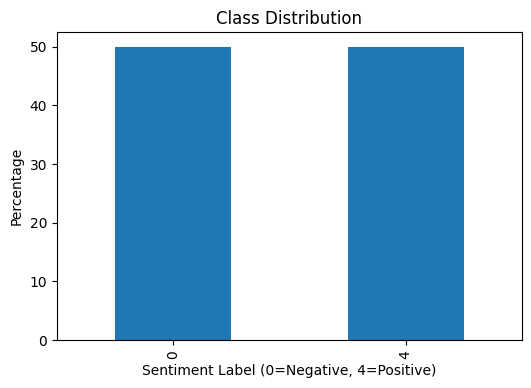

In [ ]:
# Class Imbalance
# Label distribution
label_counts = df['target'].value_counts(normalize=True) * 100
print("Label distribution (%):\n", label_counts)

# Plot
plt.figure(figsize=(6,4))
label_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Sentiment Label (0=Negative, 4=Positive)')
plt.ylabel('Percentage')
plt.show()

# Interpretation: If counts are uneven, this indicates imbalance.

In [ ]:
# Label Inconsistencies
# Check unique labels – should only be 0 and 4
unique_labels = df['target'].unique()
print("Unique labels:", unique_labels)
if set(unique_labels) != {0, 4}:
    print("Inconsistencies found: Unexpected labels present.")

Unique labels: [0 4]


In [ ]:
# Annotation Errors and Ambiguous Samples
# Simple rules for potential errors:
# - Very short texts (e.g., <10 chars) might be noisy or erroneous
short_texts = df[df['text_length'] < 10]
print("Number of very short texts (<10 chars):", len(short_texts))
print("Examples of short texts:\n", short_texts[['text', 'target']].head(10))

# - Duplicates in text (possible annotation inconsistencies if labels differ)
text_duplicates = df[df.duplicated(subset=['text'], keep=False)]
print("Number of duplicate texts:", len(text_duplicates))
if not text_duplicates.empty:
    # Check if duplicates have inconsistent labels
    inconsistent_duplicates = text_duplicates.groupby('text')['target'].nunique() > 1
    print("Number of texts with inconsistent labels across duplicates:", inconsistent_duplicates.sum())

# Manual review: Random samples for ambiguity
# Look for tweets that might be sarcastic, neutral, or mislabeled (e.g., positive text with negative label)
print("Random samples for manual review:\n", df[['text', 'target']].sample(20))

# Example of potential ambiguous samples (rule-based: contains both positive and negative words)
# Define simple keyword lists
positive_words = ['good', 'great', 'love', 'happy', 'awesome']
negative_words = ['bad', 'hate', 'sad', 'terrible', 'awful']

def has_mixed_sentiment(text):
    has_pos = any(word in text.lower() for word in positive_words)
    has_neg = any(word in text.lower() for word in negative_words)
    return has_pos and has_neg

df['mixed_sentiment'] = df['text'].apply(has_mixed_sentiment)
mixed_samples = df[df['mixed_sentiment']]
print("Number of potentially mixed/ambiguous samples:", len(mixed_samples))
print("Examples:\n", mixed_samples[['text', 'target']].head(10))

Number of very short texts (<10 chars): 3135
Examples of short texts:
            text  target
545    At work        0
580    Evicted        0
1189  headache        0
1205  Up early        0
1338    is cold       0
1343  is coldd        0
2359  is tired        0
2407   SO COLD        0
2997  Homework        0
3261   bad day        0
Number of duplicate texts: 26968
Number of texts with inconsistent labels across duplicates: 2225
Random samples for manual review:
                                                       text  target
296204       Omgeeeeee i been n traffic for two hours now        0
901881   @Reema226 http://twitpic.com/4grnh - The joy o...       4
1323216  @switch_twitch there's a girl who works in sta...       4
773843                                  tweet ya'll later        0
670577   @frugalgirl Blogger is being mean tonight  Try...       0
936085             @so0fly sounds good! have fun tomorrow        4
513449   @jsaladino geeezzzzz i do not feel the love  H...     

In [ ]:
# Error Examples
# Summarize findings
print("Summary of Issues:")
print("- Class Imbalance: ", "Yes" if abs(label_counts.diff().max()) > 10 else "No")  # Arbitrary threshold for 'imbalance'
print("- Label Inconsistencies: ", "Yes" if len(unique_labels) != 2 else "No")
print("- Annotation Errors (e.g., shorts/duplicates): ", len(short_texts) + len(text_duplicates))
print("- Ambiguous Samples: ", len(mixed_samples))

Summary of Issues:
- Class Imbalance:  No
- Label Inconsistencies:  No
- Annotation Errors (e.g., shorts/duplicates):  30103
- Ambiguous Samples:  11341


In [ ]:
# Recommendations
# Output as text
recommendations = """
Recommendations:
1. **Handle Class Imbalance**: Use undersampling, oversampling (e.g., SMOTE), or class weights in models.
2. **Clean Data**: Remove duplicates and very short texts (<10 chars) as they may be noise.
3. **Address Ambiguities**: Manually review and relabel mixed-sentiment samples, or use advanced techniques like active learning.
4. **Further Checks**: Run spell-checking on texts and validate dates/users for relevance.
5. **Augmentation**: Add more neutral samples if needed, as this dataset lacks them (binary only).
"""
print(recommendations)


Recommendations:
1. **Handle Class Imbalance**: Use undersampling, oversampling (e.g., SMOTE), or class weights in models.
2. **Clean Data**: Remove duplicates and very short texts (<10 chars) as they may be noise.
3. **Address Ambiguities**: Manually review and relabel mixed-sentiment samples, or use advanced techniques like active learning.
4. **Further Checks**: Run spell-checking on texts and validate dates/users for relevance.
5. **Augmentation**: Add more neutral samples if needed, as this dataset lacks them (binary only).



In [ ]:
# Create the text_length column
df['text_length'] = df['text'].apply(len)

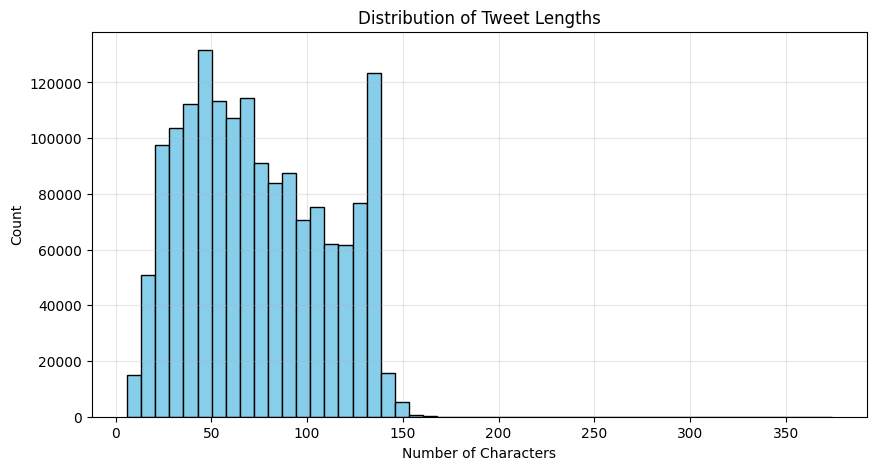

In [ ]:
# Text length distribution (highly recommended visual)
plt.figure(figsize=(10,5))
df['text_length'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.show()

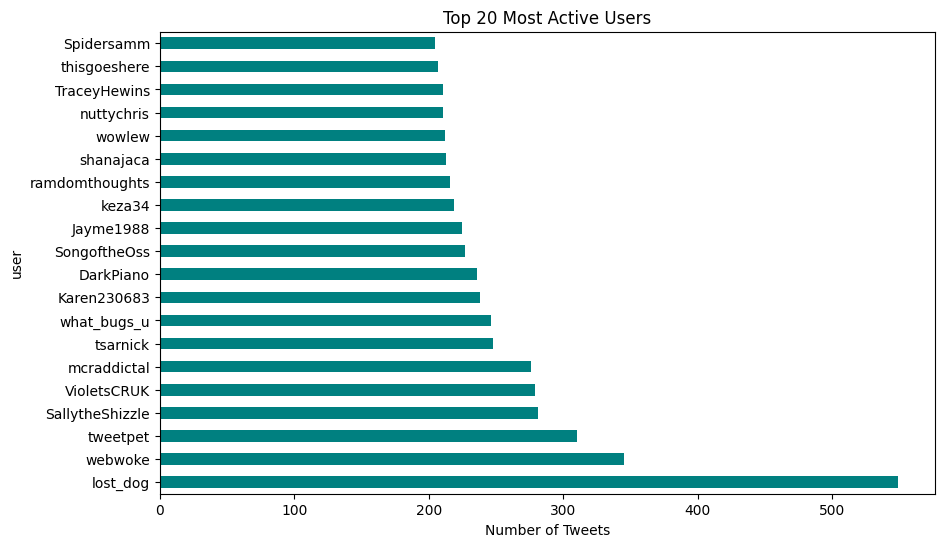

In [ ]:
# Top 20 most frequent users (sometimes reveals annotation farms)
top_users = df['user'].value_counts().head(20)
plt.figure(figsize=(10,6))
top_users.plot(kind='barh', color='teal')
plt.title('Top 20 Most Active Users')
plt.xlabel('Number of Tweets')
plt.show()

In [26]:
# ── Create mixed sentiment flag ───────────────────────────────────────────────
positive_words = ['good', 'great', 'love', 'happy', 'awesome', 'best', 
                  'nice', 'wonderful', 'excellent', 'amazing', 'fantastic']

negative_words = ['bad', 'hate', 'sad', 'terrible', 'awful', 'worst', 
                  'horrible', 'poor', 'stupid', 'shit', 'damn', 'sucks']

def has_mixed_sentiment(text):
    if not isinstance(text, str):
        return False
    text_lower = text.lower()
    has_pos = any(word in text_lower for word in positive_words)
    has_neg = any(word in text_lower for word in negative_words)
    return has_pos and has_neg

# Create the column 
print("Creating 'mixed_flag' column... (please wait)")
df['mixed_flag'] = df['text'].apply(has_mixed_sentiment)

# Now you can safely get the count
mixed_count = df['mixed_flag'].sum()
print(f"Found potentially ambiguous (mixed keywords) samples: {mixed_count:,}")

Creating 'mixed_flag' column... (please wait)
Found potentially ambiguous (mixed keywords) samples: 19,165
